In [ ]:
import ROOT as rt
file = rt.TFile.Open("recodata.root");
file.ls();
can = rt.TCanvas("can","",800,800);
nmax= 90.0
nmin =0.
nbin = 100
hnhits = rt.TH1D("hnhits", ";nhits;Entries",nbin,nmax,nmin )
hnhits.SetLineColor(rt.kRed-3)
hnhits.SetLineWidth(3)
hnhits.SetMarkerStyle(41)
#nhist->GetYaxis()->SetOffSet(3);
can.cd()

rt.recodata.Draw("n>>hnhits","","e")
can.SetLeftMargin(0.2)
can.SetLogy()
can.Draw("")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


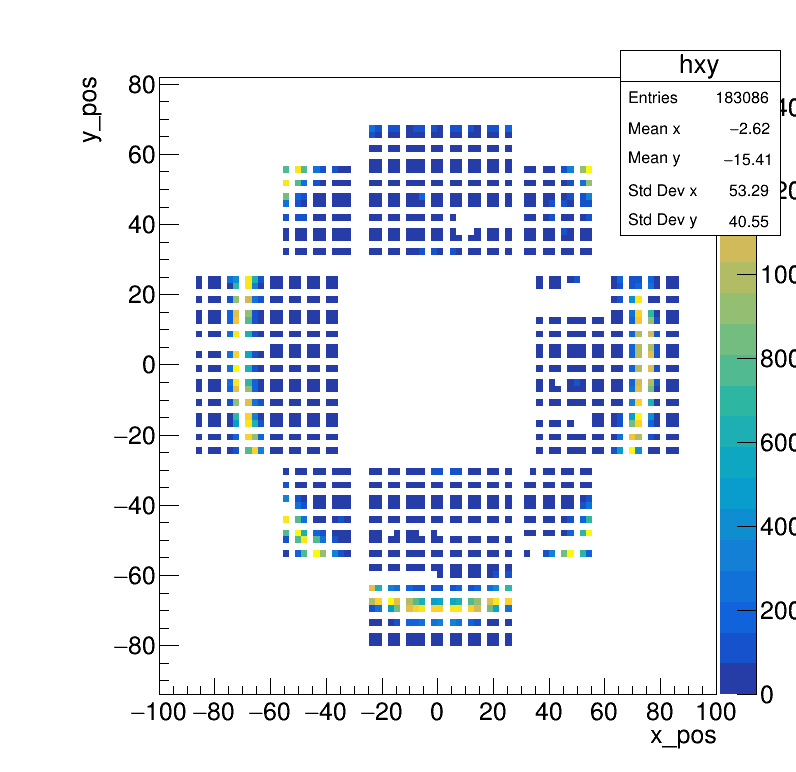

In [327]:
can = rt.TCanvas("can","",800,800);
nmax= 100;
nmin =-100;
nbin = 90;
hxy = rt.TH2D("hxy", ";x_pos;y_pos",nbin,nmax,nmin,nbin,nmax,nmin );
hnhits.SetLineColor(rt.kRed-3);
hnhits.SetLineWidth(3);
hnhits.SetMarkerStyle(41);
#nhist->GetYaxis()->SetOffSet(3);
can.cd();

rt.recodata.Draw("x:y>>hxy","","COLZ");
can.SetLeftMargin(0.2);
can.Draw("");

In [392]:
import ROOT as rt
import numpy as np
import matplotlib.pyplot as plt

file = rt.TFile.Open("recodata.root")
file.ls();

tree = file.Get("recodata")
tcut = 100.0
#x = 0.
#y = 0.
#n = 0.
#t = 0.


#tree.SetBranchAddress("x",&x)
#tree.SetBranchAddress("x",&y)
#tree.SetBranchAddress("x",&n)
#tree.SetBranchAddress("x",&t)


xlist = []
ylist = []
nlist = []
tlist = []
for branch in tree:
    #print(branch.x[0])
    nlist.append(int(branch.n))
    fx = [float(val) for val,time in zip(branch.x,branch.t) if abs(time)<tcut]
    fy = [float(val) for val,time in zip(branch.y,branch.t) if abs(time)<tcut]
    ft = [float(val) for val in branch.t if abs(val)<tcut]
    xlist.append((fx))
    ylist.append(fy)
    tlist.append(ft)
    
    # for xval,yval,tval in zip(branch.x,branch.y, branch.t):
    #    print(xval, " ", yval , "  ", tval ," \n")
    #print(x)

TNetXNGFile**		root://eoshome-i01.cern.ch//eos/user/a/agautam/SWAN_projects/INFN/Old_test_23_sinle_run_no_gas/recodata.root	
 TNetXNGFile*		root://eoshome-i01.cern.ch//eos/user/a/agautam/SWAN_projects/INFN/Old_test_23_sinle_run_no_gas/recodata.root	
  KEY: TTree	recodata;1	recodata


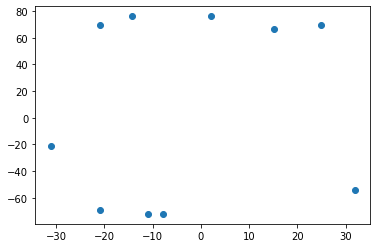

In [393]:
plt.scatter(xlist[0],ylist[0])

14567 14567
(10, 10)
(10, 10)


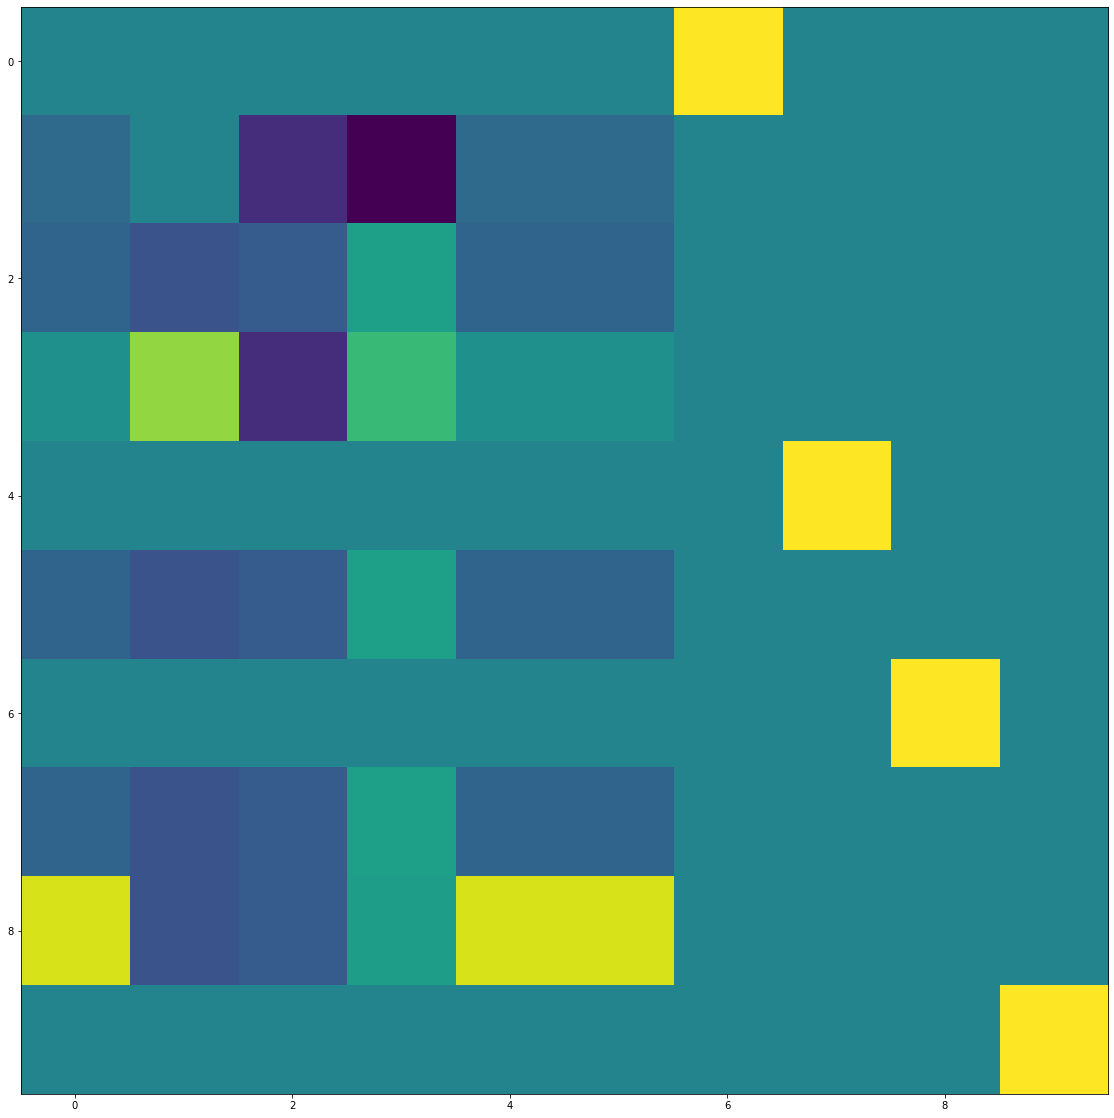

In [394]:
plt.figure(figsize=(20,20))
x1 = list(xlist)
y1 = list(ylist)
print(len(x1), len(y1))
hist, xedges , yedges = np.histogram2d(x1[0],y1[0])
#plt.scatter(x1[0],y1[0])
print(hist.shape)
rho= (hist @np.transpose(hist))
print(rho.shape)
eig, eiv = np.linalg.eig(rho)
plt.imshow(eiv)

15


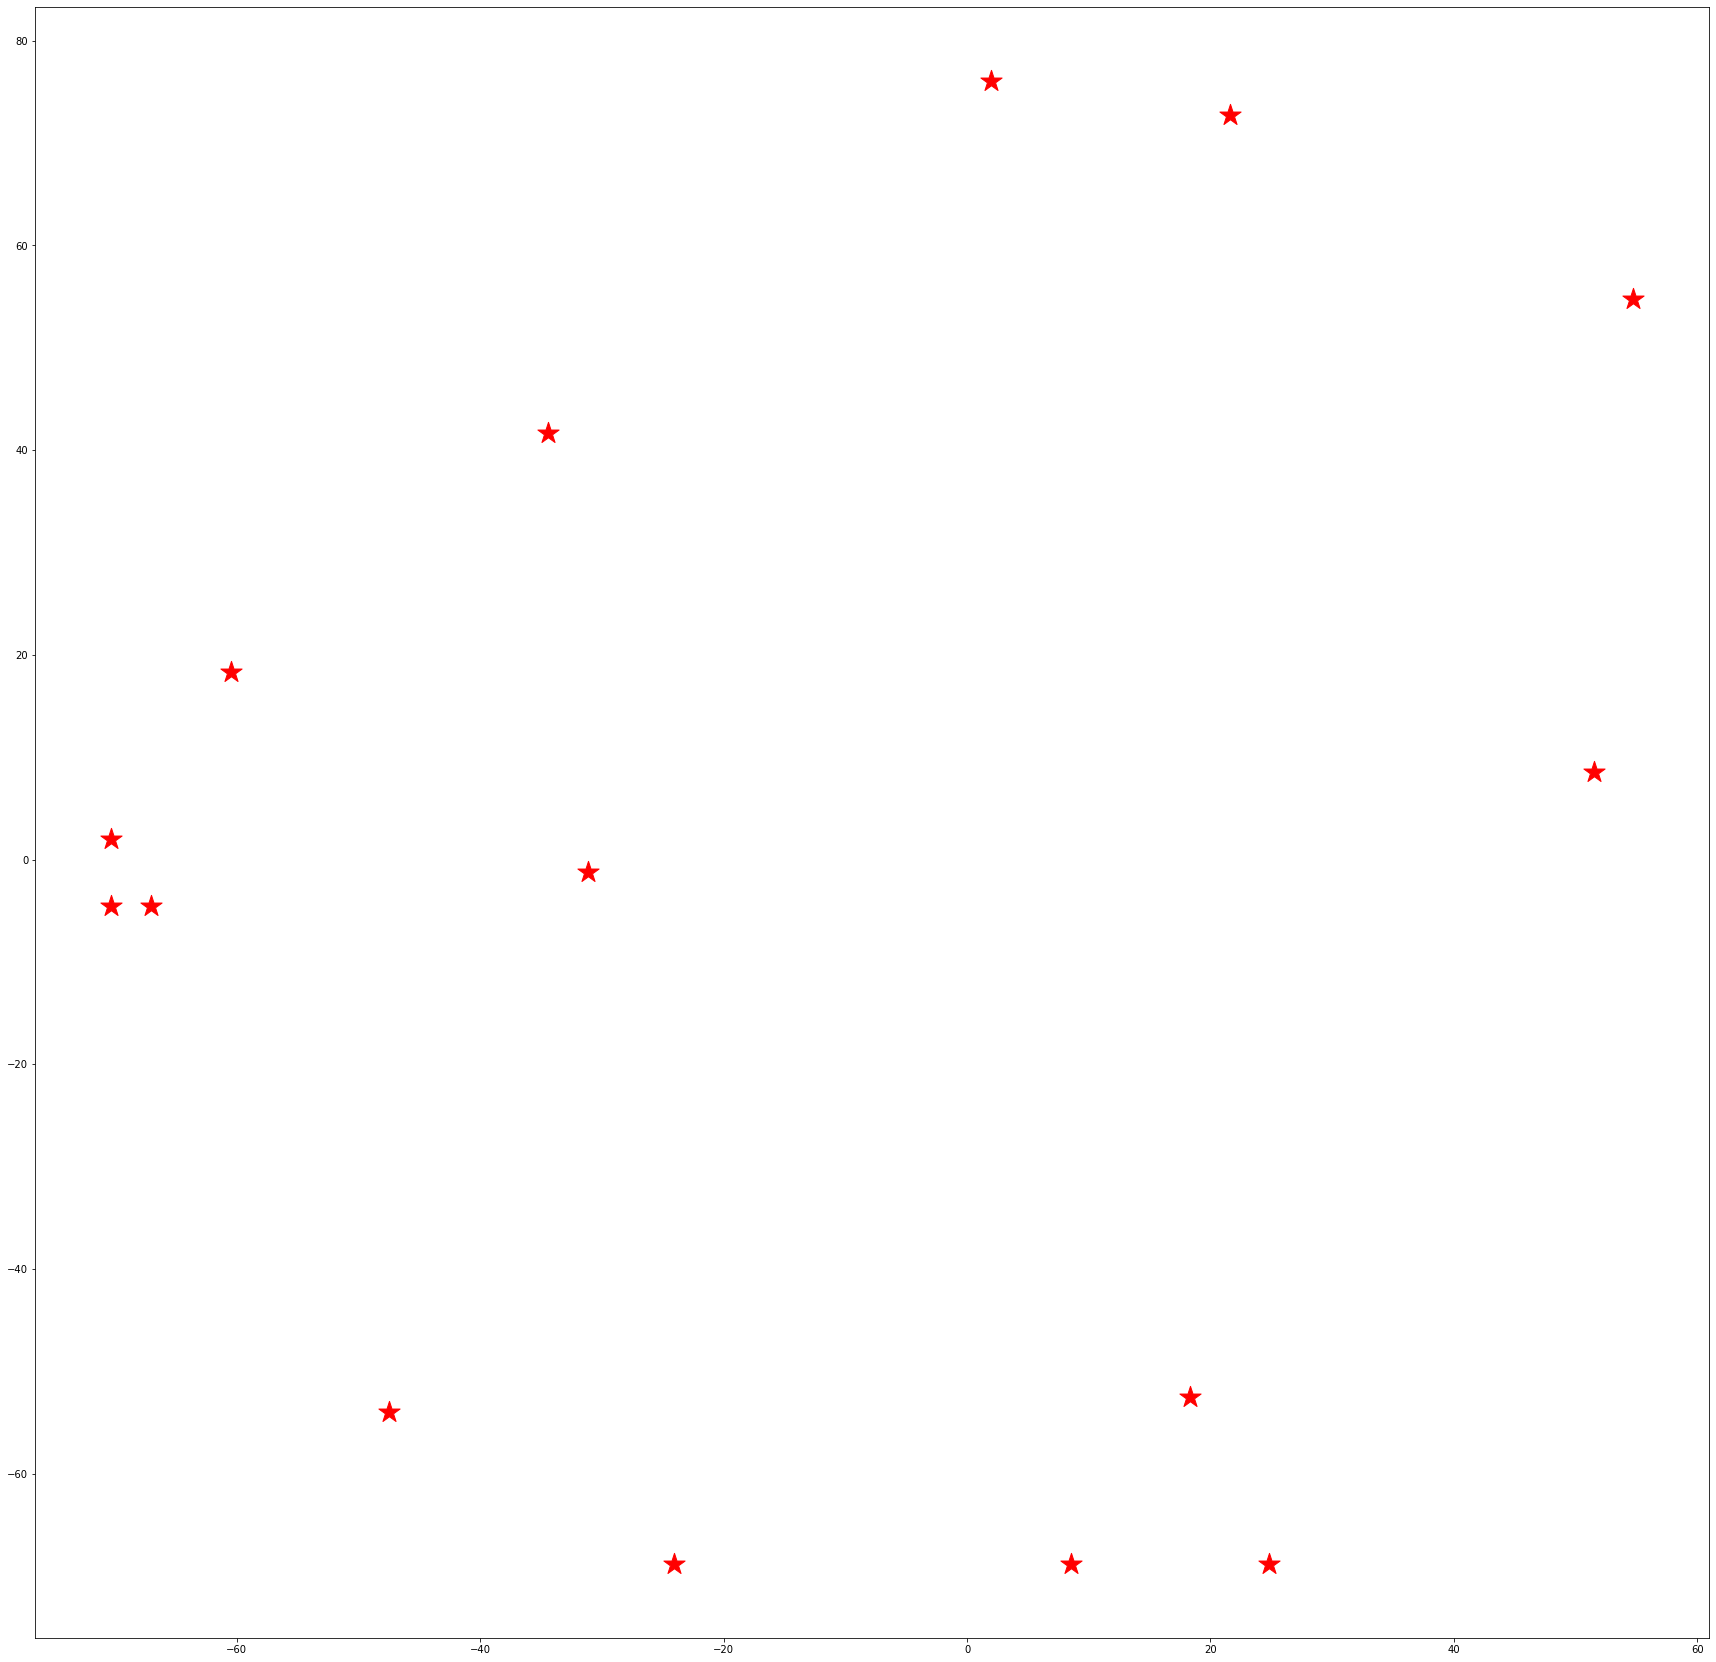

In [395]:


plt.figure(figsize=(30,30))
plt.scatter(x1[1],y1[1],c= "red", marker="*",s = 500)
#plt.scatter()
print(nlist[1])

In [396]:
import ROOT as rt
import numpy as np
import matplotlib.pyplot as plt

file = rt.TFile.Open("recodata.root")
file.ls();

tree = file.Get("recodata")
tcut = 5.0

xlist = []
ylist = []
nlist = []
tlist = []
for branch in tree:
    #print(branch.x[0])
    nlist.append(int(branch.n))
    fx = [float(val) for val,time in zip(branch.x,branch.t) if abs(time)<tcut]
    fy = [float(val) for val,time in zip(branch.y,branch.t) if abs(time)<tcut]
    ft = [float(val) for val in branch.t if abs(val)<tcut]
    xlist.append((fx))
    ylist.append(fy)
    tlist.append(ft)

TNetXNGFile**		root://eoshome-i01.cern.ch//eos/user/a/agautam/SWAN_projects/INFN/Old_test_23_sinle_run_no_gas/recodata.root	
 TNetXNGFile*		root://eoshome-i01.cern.ch//eos/user/a/agautam/SWAN_projects/INFN/Old_test_23_sinle_run_no_gas/recodata.root	
  KEY: TTree	recodata;1	recodata


In [410]:
centx = []
centy = []

for ringx, ringy in zip(xlist,ylist):
    max_diffx = 0;
    max_diffy = 0;
   # print("size of list", len(ring))
    for ir1 in range(0,len(ring)):
        for ir2 in range(0,len(ring)):
            diffx = ring[ir1]- ring[ir2]  
           # print("this shuld be 3x3", ir1, ir2)
            if abs(diffx)>abs(max_diffx):
                max_diffx = diffx
               >
                #print("should be increasing",max_diffx, ir1, ir2)
                
    for iry1 in range(0,len(ringy)):
        for iry2 in range(0,len(ringy)):
            diffy = ringy[iry1]- ringy[iry2]  
           # print("this shuld be 3x3", ir1, ir2)
            if abs(diffy)>abs(max_diffy):
                max_diffy = diffy
                
                
                #print("should be increasing",max_diffx, ir1, ir2)            
                
    print("should be cent", max_diffx/2, ",", max_diffy/2)
    centy.append(max_diffy/2)
    centx.append(max_diffx/2)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

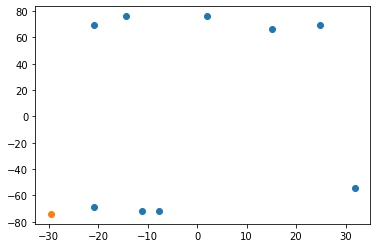

In [411]:
import matplotlib.patches as ptc
plt.figure()
plt.scatter(xlist[0],ylist[0])
plt.scatter(centx[0],centy[0])
#plt.scatter(,,c='red')
#circle = ptc.Circle((centx[1], centy[1]), 5, color='r')
#print(circle)